In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Paths

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Set the number of classes 

 This Depends on the number of static gestures in the system.

In [3]:
NUM_CLASSES = 4

# DataSet Readings

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

# Model Architecture

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/200
 1/11 [=>............................] - ETA: 9s - loss: 1.5341 - accuracy: 0.1836
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 1s 34ms/step - loss: 1.5052 - accuracy: 0.1943 - val_loss: 1.3656 - val_accuracy: 0.2500
Epoch 2/200
 1/11 [=>............................] - ETA: 0s - loss: 1.4421 - accuracy: 0.2070
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 1.3979 - accuracy: 0.2565 - val_loss: 1.2736 - val_accuracy: 0.4671
Epoch 3/200
 1/11 [=>............................] - ETA: 0s - loss: 1.3612 - accuracy: 0.2891
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 1.3109 - accuracy: 0.3358 - val_loss: 1.2014 - val_accuracy: 0.5644
Epoch 4/200
 1/11 [=>............................] - ETA: 0s - loss: 1.2760 - accuracy: 0.3438
Ep

 1/11 [=>............................] - ETA: 0s - loss: 0.4874 - accuracy: 0.8164
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 0.4679 - accuracy: 0.8132 - val_loss: 0.2763 - val_accuracy: 0.9177
Epoch 29/200
 1/11 [=>............................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8281
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 12ms/step - loss: 0.4574 - accuracy: 0.8139 - val_loss: 0.2652 - val_accuracy: 0.9192
Epoch 30/200
 1/11 [=>............................] - ETA: 0s - loss: 0.4752 - accuracy: 0.8008
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 12ms/step - loss: 0.4497 - accuracy: 0.8218 - val_loss: 0.2543 - val_accuracy: 0.9237
Epoch 31/200
 1/11 [=>............................] - ETA: 0s - loss: 0.4663 - accuracy: 0.8203
Epoch 31

 1/11 [=>............................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8828
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 0.3041 - accuracy: 0.8761 - val_loss: 0.1324 - val_accuracy: 0.9701
Epoch 56/200
 1/11 [=>............................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8789
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 0.2971 - accuracy: 0.8779 - val_loss: 0.1316 - val_accuracy: 0.9611
Epoch 57/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2915 - accuracy: 0.8867
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 0.3081 - accuracy: 0.8630 - val_loss: 0.1247 - val_accuracy: 0.9701
Epoch 58/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2538 - accuracy: 0.9219
Epoch 58:

 1/11 [=>............................] - ETA: 0s - loss: 0.2407 - accuracy: 0.8984
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 0.2603 - accuracy: 0.8982 - val_loss: 0.0817 - val_accuracy: 0.9850
Epoch 83/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2826 - accuracy: 0.8750
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 13ms/step - loss: 0.2535 - accuracy: 0.8970 - val_loss: 0.0794 - val_accuracy: 0.9865
Epoch 84/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2260 - accuracy: 0.9023
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 0.2434 - accuracy: 0.8993 - val_loss: 0.0796 - val_accuracy: 0.9865
Epoch 85/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2465 - accuracy: 0.8984
Epoch 85

 1/11 [=>............................] - ETA: 0s - loss: 0.2412 - accuracy: 0.9062
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 0.2261 - accuracy: 0.9060 - val_loss: 0.0597 - val_accuracy: 0.9895
Epoch 110/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1871 - accuracy: 0.9336
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 0.2194 - accuracy: 0.9150 - val_loss: 0.0582 - val_accuracy: 0.9910
Epoch 111/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9336
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 0.2151 - accuracy: 0.9124 - val_loss: 0.0575 - val_accuracy: 0.9895
Epoch 112/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2324 - accuracy: 0.9023
Epoch

Epoch 136/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8828
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 0.1939 - accuracy: 0.9262 - val_loss: 0.0435 - val_accuracy: 0.9970
Epoch 137/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9102
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 0.1949 - accuracy: 0.9203 - val_loss: 0.0453 - val_accuracy: 0.9925
Epoch 138/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2063 - accuracy: 0.9062
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 0.1977 - accuracy: 0.9188 - val_loss: 0.0429 - val_accuracy: 0.9955
Epoch 139/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1515 - accur

Epoch 163/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1683 - accuracy: 0.9141
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 0.1946 - accuracy: 0.9229 - val_loss: 0.0350 - val_accuracy: 0.9970
Epoch 164/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1733 - accuracy: 0.9258
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 0.1710 - accuracy: 0.9300 - val_loss: 0.0375 - val_accuracy: 0.9970
Epoch 165/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1779 - accuracy: 0.9297
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 0.1862 - accuracy: 0.9236 - val_loss: 0.0386 - val_accuracy: 0.9970
Epoch 166/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1805 - accura

Epoch 190/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9258
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 0.1680 - accuracy: 0.9393 - val_loss: 0.0317 - val_accuracy: 0.9970
Epoch 191/200
 1/11 [=>............................] - ETA: 0s - loss: 0.2054 - accuracy: 0.9258
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 0.1870 - accuracy: 0.9251 - val_loss: 0.0324 - val_accuracy: 0.9985
Epoch 192/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1543 - accuracy: 0.9336
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 0.1616 - accuracy: 0.9322 - val_loss: 0.0322 - val_accuracy: 0.9985
Epoch 193/200
 1/11 [=>............................] - ETA: 0s - loss: 0.1676 - accura

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9970


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 110ms/step
[9.9694246e-01 3.9819033e-09 3.0560042e-03 1.5171127e-06]
0


# Confusion Matrix

21/21 [==============================] - 0s 2ms/step


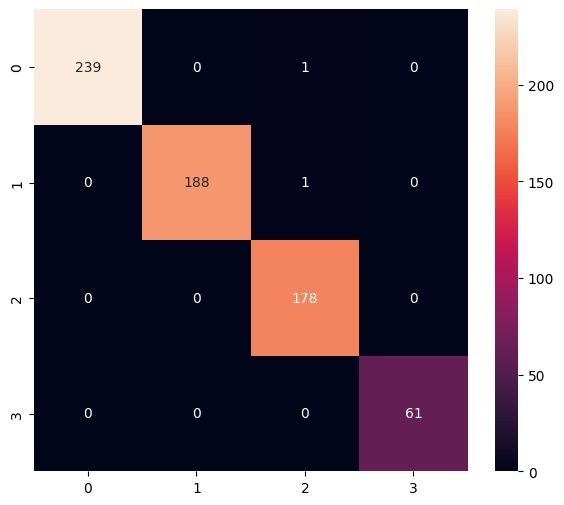

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      0.99      1.00       189
           2       0.99      1.00      0.99       178
           3       1.00      1.00      1.00        61

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# conversion of the model to Tensorflow Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\OmarM\AppData\Local\Temp\tmpyl7uhgri\assets


INFO:tensorflow:Assets written to: C:\Users\OmarM\AppData\Local\Temp\tmpyl7uhgri\assets


6544

# Inference Test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9694246e-01 3.9819028e-09 3.0560072e-03 1.5171139e-06]
0
